# **Dataset Information**
PNB deals in all home loans. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have ***to predict whether a loan would be approved or not***. Below is the dataset attributes with description.

In This Project We Will Testing Our Model By Three Algorithms:

1:-Logistic Regression

2:-Decision Tree

3:-Random Forest

# Import Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset (CSV Format)

In [ ]:
df_train = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
df_test = pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")

In [ ]:
df_train.shape

(614, 13)

In [ ]:
df_test.shape

(367, 12)

In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Missing Values: 
A) Check where there are missing values and fix them appropriately

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)

In [ ]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

In [ ]:
missing_data = pd.concat([total, percent*100], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


Credit_History, Self_Emoloyed, LoanAmount, Dependents, Loan_Amount_Term, Gender and Married have missing values

B) Fill missing values

In [ ]:
df_train["Gender"] = df_train["Gender"].fillna(
df_train["Gender"].dropna().mode().values[0] )

In [ ]:
df_train["Married"] = df_train["Married"].fillna(
df_train["Married"].dropna().mode().values[0] )


In [ ]:
df_train["Dependents"] = df_train["Dependents"].fillna(
df_train["Dependents"].dropna().mode().values[0] )


In [ ]:
df_train["Self_Employed"] = df_train["Self_Employed"].fillna(
df_train["Self_Employed"].dropna().mode().values[0] )

In [ ]:
df_train["LoanAmount"] = df_train["LoanAmount"].fillna(df_train["LoanAmount"].dropna().median() )


In [ ]:
df_train["Loan_Amount_Term"] = df_train["Loan_Amount_Term"].fillna(
df_train["Loan_Amount_Term"].dropna().mode().values[0] )


In [ ]:
df_train["Credit_History"] = df_train["Credit_History"].fillna(
df_train["Credit_History"].dropna().mode().values[0] )

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


In [ ]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# Exploratory Data Analysis

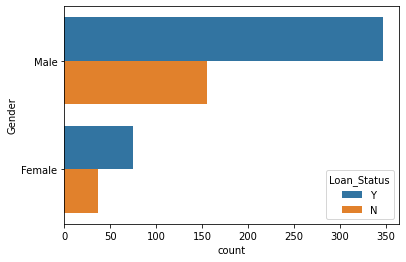

In [ ]:
sns.countplot(y="Gender" ,hue ='Loan_Status',data=df_train)
plt.show()

More males are on loan than females. Also, those that are on loan are more than otherwise

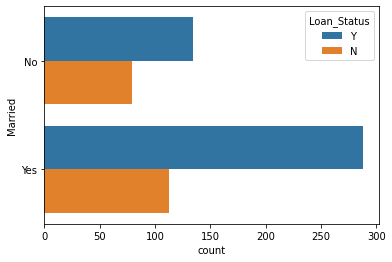

In [ ]:
sns.countplot(y="Married" ,hue ='Loan_Status',data=df_train)
plt.show()

Married people have more loan than unmarried

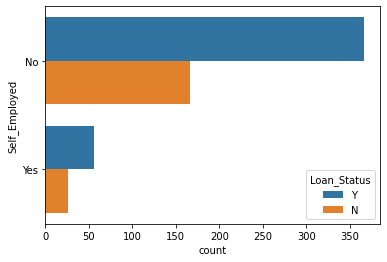

In [ ]:
sns.countplot(y="Self_Employed" ,hue ='Loan_Status',data=df_train)
plt.show()

The category of those that take loans is less of self-employed(own business) people. That’s those are not self-employed probably salalary earners obtain more loan.

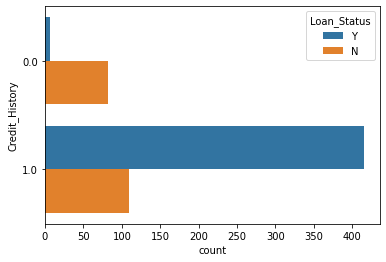

In [ ]:
sns.countplot(y="Credit_History" ,hue ='Loan_Status',data=df_train)
plt.show()

According to the credit history, greater number of people pay back their loans.

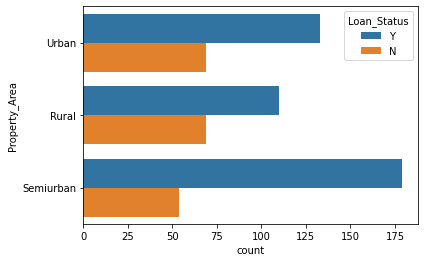

In [ ]:
sns.countplot(y="Property_Area" ,hue ='Loan_Status',data=df_train)
plt.show()

Semiurban obtain more loan, folowed by Urban and then rural

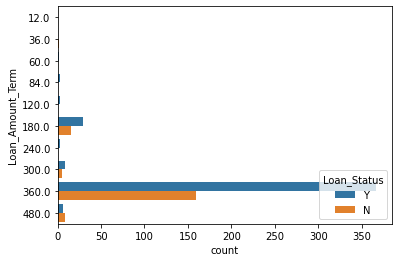

In [ ]:
sns.countplot(y="Loan_Amount_Term" ,hue ='Loan_Status',data=df_train)
plt.show()

An extremely high number of them go for a 360 days loan term. That’s pay back within a year

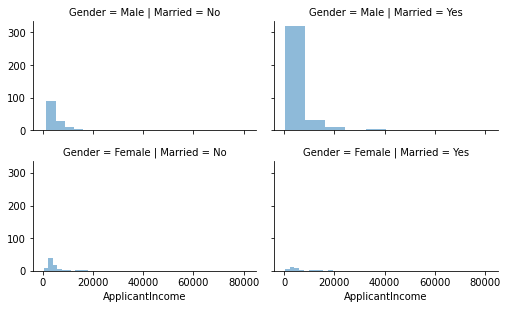

In [ ]:
grid = sns.FacetGrid(df_train, row= "Gender",col='Married',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()
plt.show()

Males generally have the highest income. Explicitly, Males that are married have greater income that unmarried male.

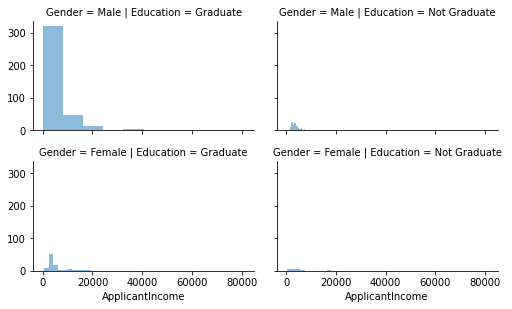

In [ ]:
grid = sns.FacetGrid(df_train, row= "Gender",col='Education',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()
plt.show()

A graduate and married individual has more income

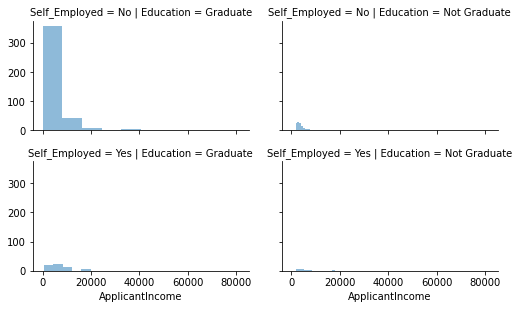

In [ ]:
grid = sns.FacetGrid(df_train, row= "Self_Employed",col='Education',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()
plt.show()

A graduate but not self-employed has more income

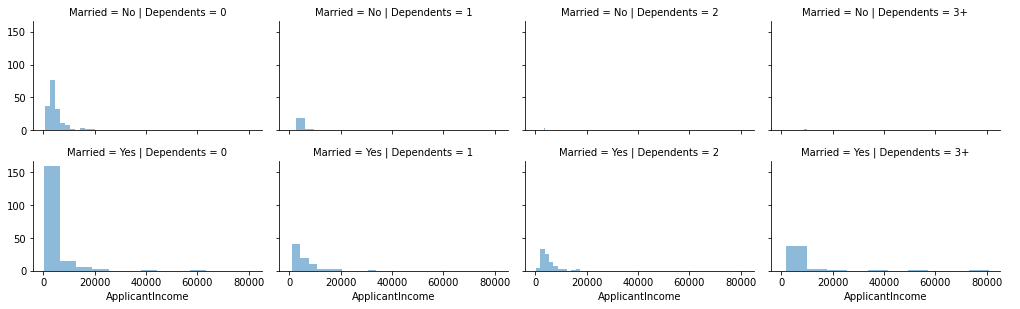

In [ ]:
grid = sns.FacetGrid(df_train, row= "Married",col='Dependents',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()
plt.show()

Not married and no one is dependent on such has more income. Also, Married and no one dependent has greater income with a decreasing effect as the dependents increase

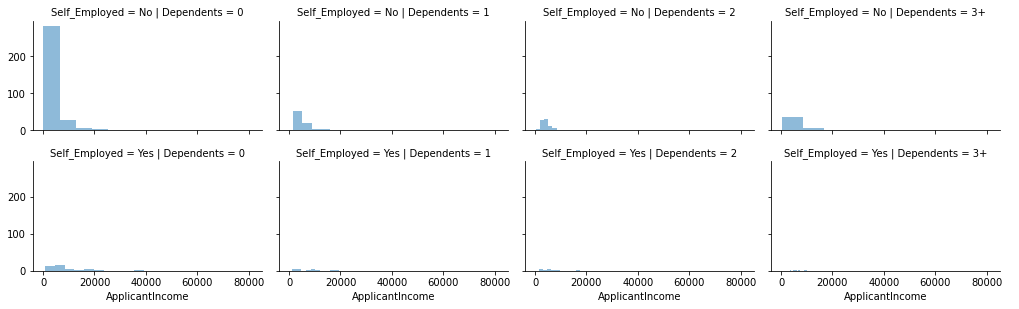

In [ ]:
grid = sns.FacetGrid(df_train, row= "Self_Employed",col='Dependents',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()
plt.show()

No one is dependent and self-employed has more income

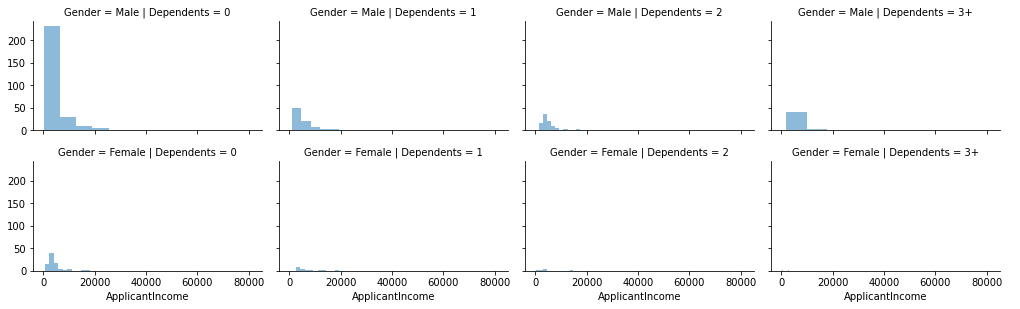

In [ ]:
grid = sns.FacetGrid(df_train, row= "Gender",col='Dependents',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()
plt.show()

No one is dependent and a male tremendously has more income

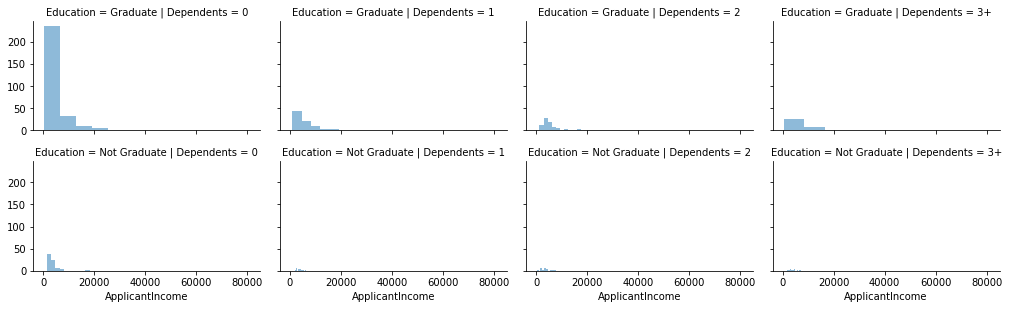

In [ ]:
grid = sns.FacetGrid(df_train, row= "Education",col='Dependents',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()
plt.show()

A graduate with no one dependent has more income

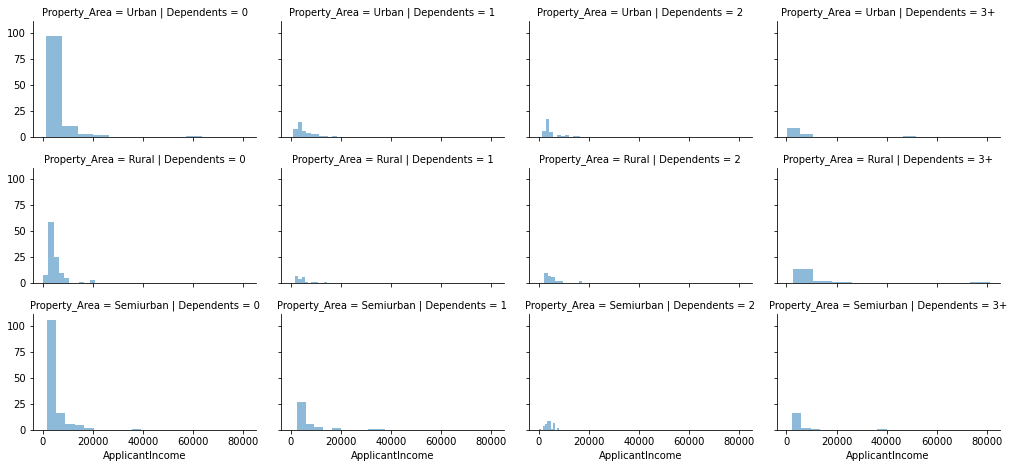

In [ ]:
grid = sns.FacetGrid(df_train, row= "Property_Area",col='Dependents',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()
plt.show()

No one is dependent and have property in urban, rural and semiurban has more income

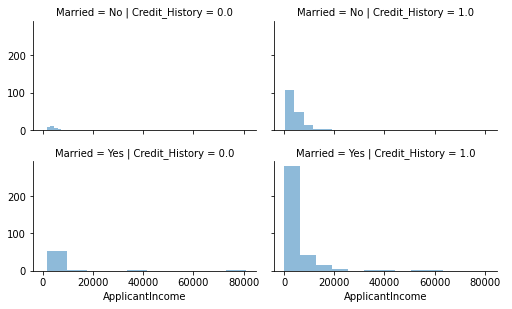

In [ ]:
grid = sns.FacetGrid(df_train, row= "Married",col='Credit_History',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()
plt.show()

Married and has a good credit history depicts more income. Also, Not married but has a good credit history follows in the hierarchy.

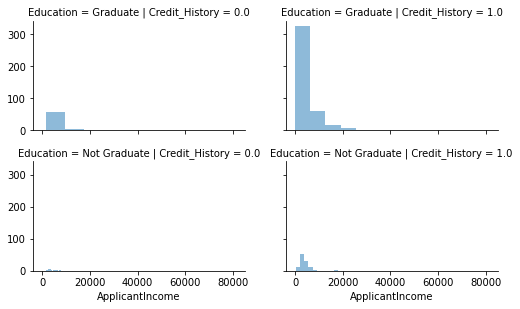

In [ ]:
grid = sns.FacetGrid(df_train, row= "Education",col='Credit_History',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()
plt.show()

Educated with good credit history depicts a good income. Also, not a graduate and have a good credit history can be traced to having a better income than a fellow with no degree

# Encoding to numeric data; getting ready for training

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
code_numeric = {"Male": 1, "Female": 2,"Yes": 1, "No": 2,"Graduate": 1, 
                "Not Graduate": 2,"Urban": 3, "Semiurban": 2,"Rural": 1,"Y": 1, "N": 0,"3+": 3}

In [ ]:
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [ ]:
df_train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
#drop the uniques loan id
df_train.drop("Loan_ID", axis = 1, inplace = True)

In [ ]:
df_train["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


Converting "Dependents" feature to numeric


In [ ]:
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)

In [ ]:
df_train.drop(["Dependents"], axis = 1, inplace = True)
df_test.drop(["Dependents"], axis = 1, inplace = True)

In [ ]:
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


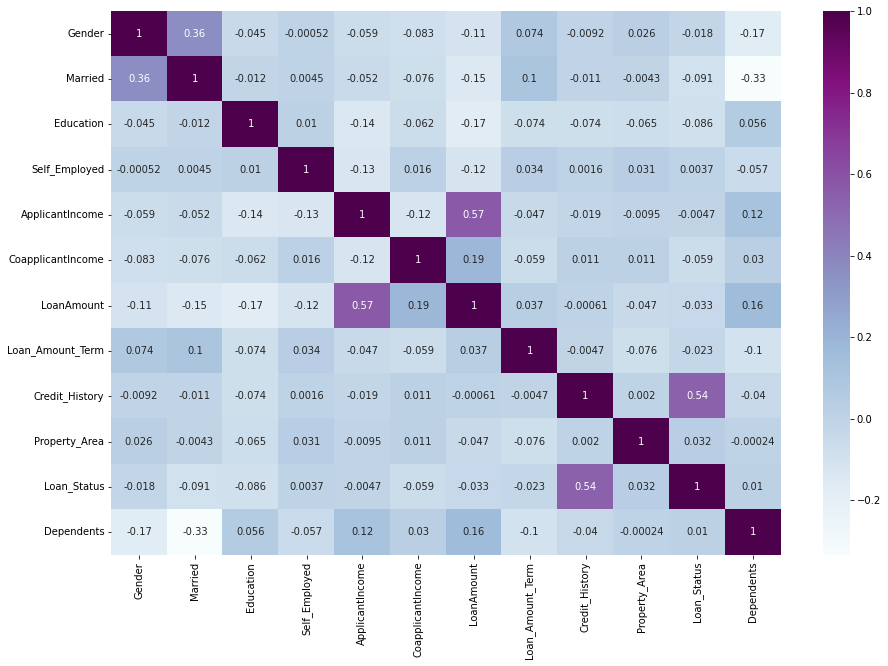

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")
plt.show()

In [ ]:
# total income
df_train['Total_Income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents,Total_Income
0,1,2,1,2,5849,0.0,128.0,360.0,1.0,3,1,0,5849.0
1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0,1,6091.0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,1,0,3000.0
3,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,1,0,4941.0
4,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,1,0,6000.0


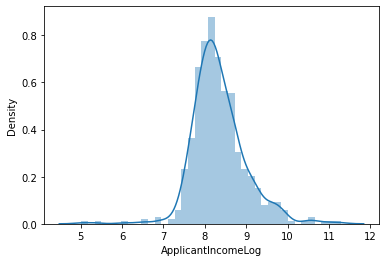

In [ ]:
# apply log transformation to the attribute
df_train['ApplicantIncomeLog'] = np.log(df_train['ApplicantIncome']+1)
sns.distplot(df_train["ApplicantIncomeLog"])

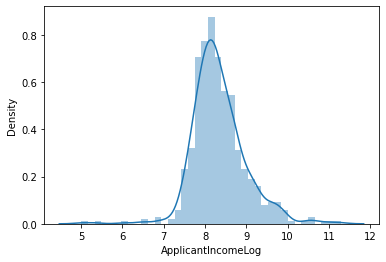

In [ ]:
# apply log transformation to the attribute
df_train['ApplicantIncomeLog'] = np.log(df_train['ApplicantIncome'])
sns.distplot(df_train["ApplicantIncomeLog"])

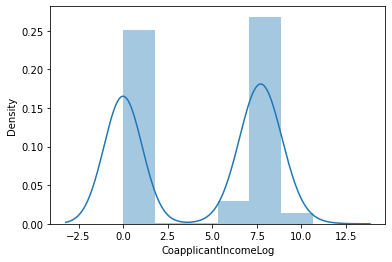

In [ ]:
df_train['CoapplicantIncomeLog'] = np.log(df_train['CoapplicantIncome']+1)
sns.distplot(df_train["CoapplicantIncomeLog"])

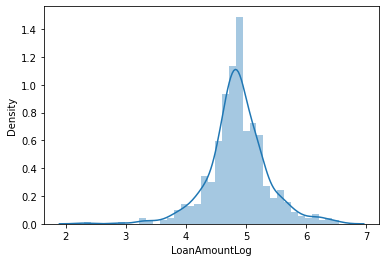

In [ ]:
df_train['LoanAmountLog'] = np.log(df_train['LoanAmount']+1)
sns.distplot(df_train["LoanAmountLog"])

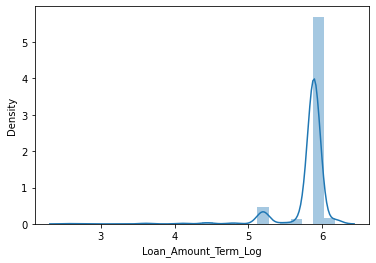

In [ ]:
df_train['Loan_Amount_Term_Log'] = np.log(df_train['Loan_Amount_Term']+1)
sns.distplot(df_train["Loan_Amount_Term_Log"])

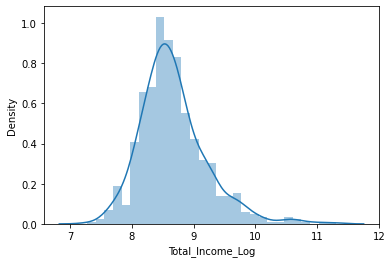

In [ ]:
df_train['Total_Income_Log'] = np.log(df_train['Total_Income']+1)
sns.distplot(df_train["Total_Income_Log"])

# Coorelation Matrix


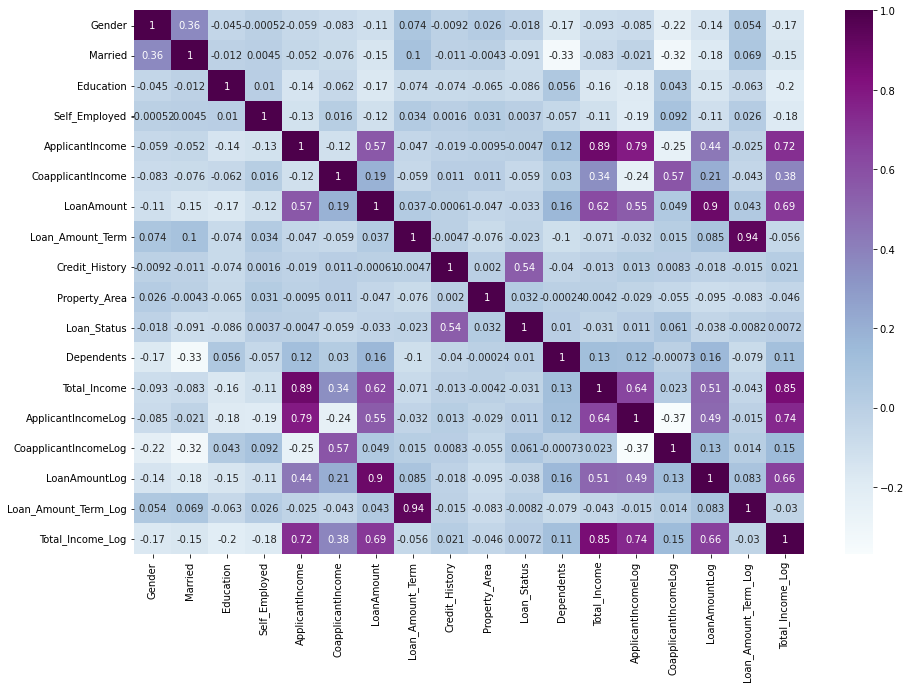

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")
plt.show()

In [ ]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'CoapplicantIncomeLog']
df_train = df_train.drop(columns=cols, axis=1)
df_train.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Dependents,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,2,1,2,1.0,3,1,0,8.674026,4.859812,5.888878,8.674197
1,1,1,1,2,1.0,1,0,1,8.430109,4.859812,5.888878,8.714732
2,1,1,1,1,1.0,3,1,0,8.006368,4.204693,5.888878,8.006701
3,1,1,2,2,1.0,3,1,0,7.856707,4.795791,5.888878,8.505525
4,1,2,1,2,1.0,3,1,0,8.699515,4.955827,5.888878,8.699681


# Removing Outliers

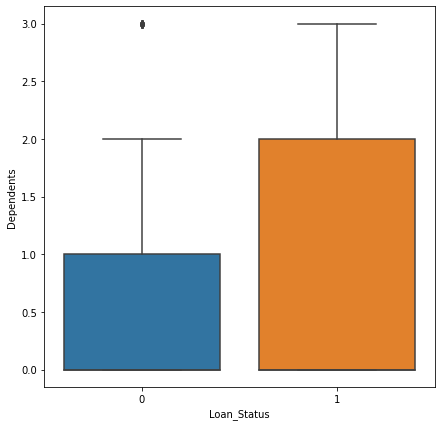

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df_train,y ='Dependents',x='Loan_Status')
plt.show()

In [ ]:
A=df_train[(df_train['Loan_Status']==0) & (df_train['Dependents']>2.5)].index

In [ ]:
df_train.drop(A,inplace=True)

# Train-Test Split

In [ ]:
# specify input and output attributes
X = df_train.drop(columns=['Loan_Status'], axis=1)
y = df_train['Loan_Status']

In [ ]:
X.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Dependents,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,2,1,2,1.0,3,0,8.674026,4.859812,5.888878,8.674197
1,1,1,1,2,1.0,1,1,8.430109,4.859812,5.888878,8.714732
2,1,1,1,1,1.0,3,0,8.006368,4.204693,5.888878,8.006701
3,1,1,2,2,1.0,3,0,7.856707,4.795791,5.888878,8.505525
4,1,2,1,2,1.0,3,0,8.699515,4.955827,5.888878,8.699681


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
df_train.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Dependents,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,2,1,2,1.0,3,1,0,8.674026,4.859812,5.888878,8.674197
1,1,1,1,2,1.0,1,0,1,8.430109,4.859812,5.888878,8.714732
2,1,1,1,1,1.0,3,1,0,8.006368,4.204693,5.888878,8.006701
3,1,1,2,2,1.0,3,1,0,7.856707,4.795791,5.888878,8.505525
4,1,2,1,2,1.0,3,1,0,8.699515,4.955827,5.888878,8.699681


# Testing The Model With Logistic Regression.

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)

In [ ]:
print(evaluation*100)

91.1660777385159


In [ ]:
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print('accuracy is',accuracy_score(ypred,y_test)*100)

[[ 25  20]
 [  5 129]]
              precision    recall  f1-score   support

           0       0.83      0.56      0.67        45
           1       0.87      0.96      0.91       134

    accuracy                           0.86       179
   macro avg       0.85      0.76      0.79       179
weighted avg       0.86      0.86      0.85       179

accuracy is 86.03351955307262


# Testing The Model With Decision Tree Classifier.

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
ypred_tree=tree.predict(X_test)
print(ypred_tree)

[1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0
 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0]


In [ ]:
evaluation_tree = f1_score(y_test, ypred_tree)
print(evaluation_tree*100)

82.53968253968254


In [ ]:
print(confusion_matrix(y_test,ypred_tree))
print(classification_report(y_test,ypred_tree))
print('accuracy is',accuracy_score(ypred_tree,y_test)*100)

[[ 31  14]
 [ 30 104]]
              precision    recall  f1-score   support

           0       0.51      0.69      0.58        45
           1       0.88      0.78      0.83       134

    accuracy                           0.75       179
   macro avg       0.69      0.73      0.71       179
weighted avg       0.79      0.75      0.76       179

accuracy is 75.41899441340783


# Testing The Model With Random Forest Classifier.


In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
ypred_forest=forest.predict(X_test)
print(ypred_forest)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0]


In [ ]:
print(confusion_matrix(y_test,ypred_forest))
#print(classification_report(y_test,ypred_forest))
print('accuracy is',accuracy_score(y_test,ypred_forest)*100)

[[ 26  19]
 [  4 130]]
accuracy is 87.15083798882681


# Model Evaluation

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train) 

In [ ]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7961630695443646


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test) 

In [ ]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8603351955307262


# Predective System 

In [ ]:
input_data=(1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

logistic_prediction = model.predict(input_data_reshaped)


if (logistic_prediction[0]=='0'):
  print('logistic_prediction--Loan Not Approved')
else:
  print('logistic_prediction--Loan Approved')

# Decision Tree
tree_prediction = tree.predict(input_data_reshaped)

if (tree_prediction[0]=='0'):
  print('Decision Tree-- Loan Not Approved')
else:
  print('Decision Tree-- Loan Approved')

# Random forest classifier
Random_forest_predection = forest.predict(input_data_reshaped)

if (tree_prediction[0]=='0'):
  print('Random_forest_predection--Loan Not Approved')
else:
  print('Random_forest_predection--Loan Approved')

logistic_prediction--Loan Approved
Decision Tree-- Loan Approved
Random_forest_predection--Loan Approved


# Conculsion:
Ramdom Forest Classifier Gives You the Best Model:-
87%